<a href="https://colab.research.google.com/github/NonKhuna/SuperAI_Engineer/blob/master/22p21c0495_W5HW1_khunanon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Data**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!gdown --id 1Hr8h3FcHKqsm6zOFkGXOMNnqpVjNIQB-

Downloading...
From: https://drive.google.com/uc?id=1Hr8h3FcHKqsm6zOFkGXOMNnqpVjNIQB-
To: /content/Online Retail.csv
44.7MB [00:00, 78.9MB/s]


# **Data Import and Exploratory**

In [ ]:
df = pd.read_csv('Online Retail.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531283 entries, 0 to 531282
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    531283 non-null  object 
 1   StockCode    531283 non-null  object 
 2   Description  530691 non-null  object 
 3   Quantity     531283 non-null  int64  
 4   InvoiceDate  531283 non-null  object 
 5   UnitPrice    531283 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      531283 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.4+ MB


In [ ]:
## check missing data

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133359
Country             0
dtype: int64

In [ ]:
## check duplication

df.nunique()

InvoiceNo      20728
StockCode       3941
Description     4077
Quantity         393
InvoiceDate    19050
UnitPrice       1292
CustomerID      4339
Country           38
dtype: int64

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,531283.000000,531283.000000,397924.000000
mean,10.655299,3.898954,15294.315171
std,156.830617,35.876279,1713.169877
min,1.000000,0.000000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [ ]:
def M2D(x,y):
    D31 = [1,3,5,7,8,10,12]
    if x == 2 :
      if y%4 == 0 :
        return 29
      else :
        return 28
    if x in D31 :
      return 31
    else :
      return 30
  
def DayAt(d,m,y) :
  qsD = [0]
  for i in range(12) :
      x = i+1
      qsD.append(qsD[i]+M2D(x,y))
  return d + qsD[m-1]

def convert2d(d) :
  ls = []
  for i in d :
    x = str(i).split('-')
    ls.append(DayAt(int(x[2]),int(x[1]),int(x[0])))
  return ls

In [ ]:
## data preparation

df['Amount'] = df['Quantity'] * df['UnitPrice']

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Date'] = df['InvoiceDate'].dt.date
df['Time'] = df['InvoiceDate'].dt.time
df['Hour'] = df['InvoiceDate'].dt.hour
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['Date'].apply(lambda x : x.replace(day=1))
df['Day'] = convert2d(df['Date'])

df['CustomerID'] = df['CustomerID'].astype(str)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date,Time,Hour,Month,Day,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00,8,2010-12-01,335,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,8,2010-12-01,335,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,08:26:00,8,2010-12-01,335,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,8,2010-12-01,335,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,8,2010-12-01,335,2010


In [ ]:
df['Day'].value_counts()
#df['Month'].value_counts()

339    8011
342    7443
340    7085
335    5894
341    5317
       ... 
219     529
353     518
121     448
356     286
37      279
Name: Day, Length: 298, dtype: int64

In [ ]:
#clean Data
df = df[df['Amount']<=6000]

# **Year**

In [ ]:
#data preparation
first_year = df[df['Year']==2010]
second_year = df[df['Year']==2011]

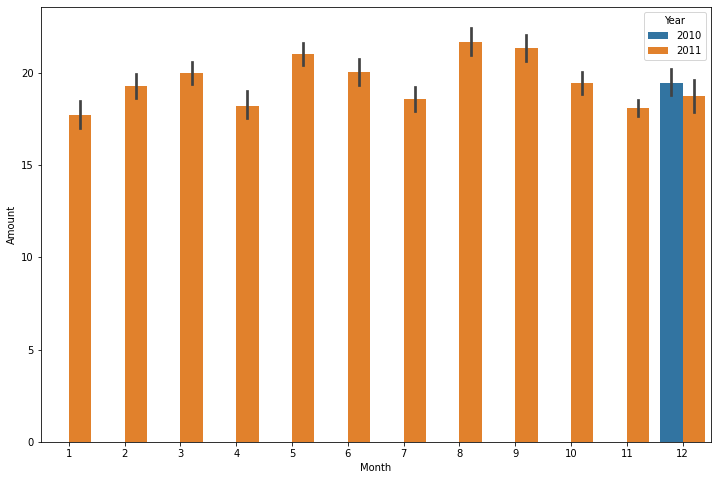

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='Month',y='Amount',data = df, hue='Year')

# **Hour sales**

In [ ]:
time_sale = df.groupby(by = 'Hour').agg({'Amount':'sum'}).reset_index()
time_sale.head()

,Hour,Amount
0,6,4.250
1,7,31059.210
2,8,283868.520
3,9,821798.221
4,10,1369559.101


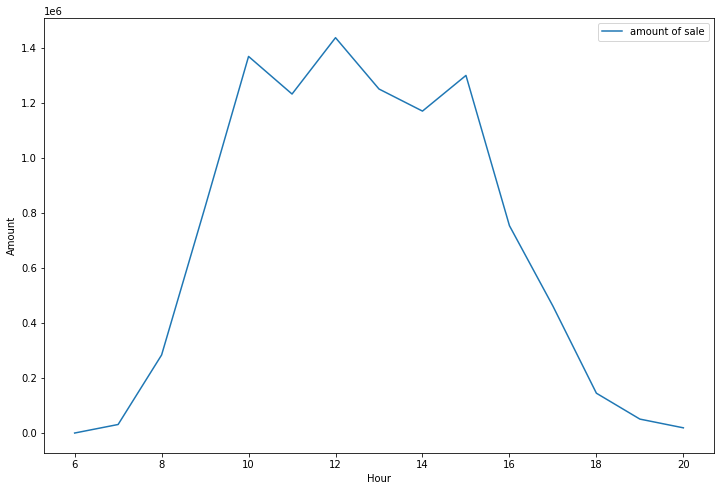

In [ ]:
# time for sale on 1 day

plt.figure(figsize=(12,8))
sns.lineplot(x = 'Hour', y = 'Amount', data = time_sale,label ='amount of sale')

# **Day sale**

In [ ]:
#data preparation

day_df = df.groupby(by=['Day','Hour']).agg({'Amount':'mean'}).reset_index()
day_df['Amount'] = day_df['Amount']/100
day_df.max()
day_df.head()

,Day,Hour,Amount
0,4,10,0.243369
1,4,11,0.105785
2,4,12,0.137243
3,4,13,0.115273
4,4,14,0.247847


#**New Custumer**

In [ ]:
def calculate_custumer() :
  Add = [0]
  remove =[0]
  total = [0]
  bf = dict()
  for i in df['Month'].value_counts().index :
    Custumbers = df[df['Month']==i]['CustomerID'].value_counts()
    if len(bf) == 0 :
      for j in range(len(Custumbers.index)) :
        bf[j] = Custumbers[j]
    else :
      n = dict()
      Newc = 0
      for j in range(len(Custumbers.index)) :
        n[j] = Custumbers[j]
        if bf.get(j) == None :
            Newc+=1
        else :
            del bf[j]
      dis = len(bf)
      Add.append(Newc)
      remove.append(dis)
      bf = n
      total.append(len(n))
  return [Add,remove,total]
          


In [ ]:
CustumerM = calculate_custumer()
dfc = pd.DataFrame()
dfc['add'] = CustumerM[0]
dfc['remove'] = CustumerM[1]
dfc['total'] = CustumerM[2]
dfc['Month'] = df['Month'].value_counts().index
dfc.head()

,add,remove,total,Month
0,0,0,0,2011-11-01
1,0,301,1365,2011-10-01
2,0,98,1267,2011-09-01
3,0,381,886,2010-12-01
4,64,0,950,2011-07-01


[Text(0, 0.5, 'Quantity'), Text(0.5, 0, 'Mount')]

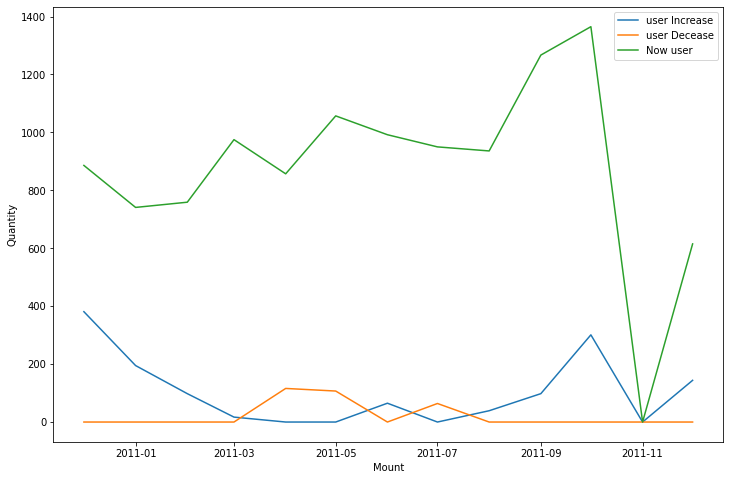

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=dfc,x='Month',y='remove', label = "user Increase")
sns.lineplot(data=dfc,x='Month',y='add' , label = "user Decease")
ax = sns.lineplot(data=dfc,x='Month',y='total',label = "Now user")
ax.set(xlabel='Mount', ylabel='Quantity')

#**Country**

In [ ]:
## data preparation
country_sale = df[df['Country']!='United Kingdom'].groupby('Country')[['Amount']].sum().reset_index().sort_values(by='Amount', ascending=False)
country_sale.head()

,Country,Amount
24,Netherlands,285446.34
10,EIRE,283453.96
14,Germany,228867.14
13,France,209715.11
0,Australia,138521.31


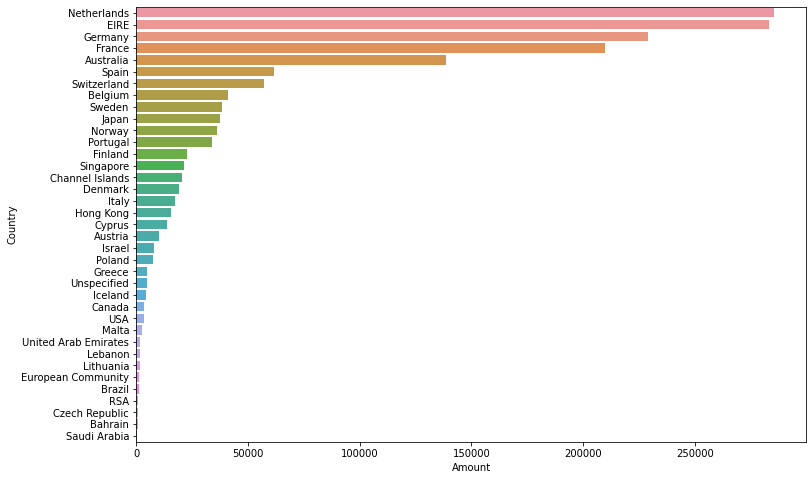

In [ ]:
## plot profit from country

plt.figure(figsize=(12,8))
sns.barplot(y='Country',x='Amount',data = country_sale, label = '.')


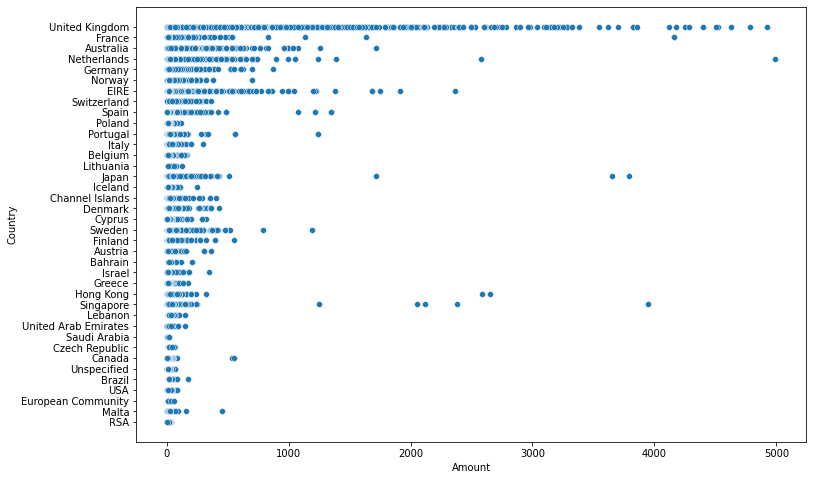

In [ ]:
#scatterplot
plt.figure(figsize=(12,8))
sns.scatterplot(y = 'Country',x='Amount',data=df[df['Amount']<=6000])

# **Dashboard**

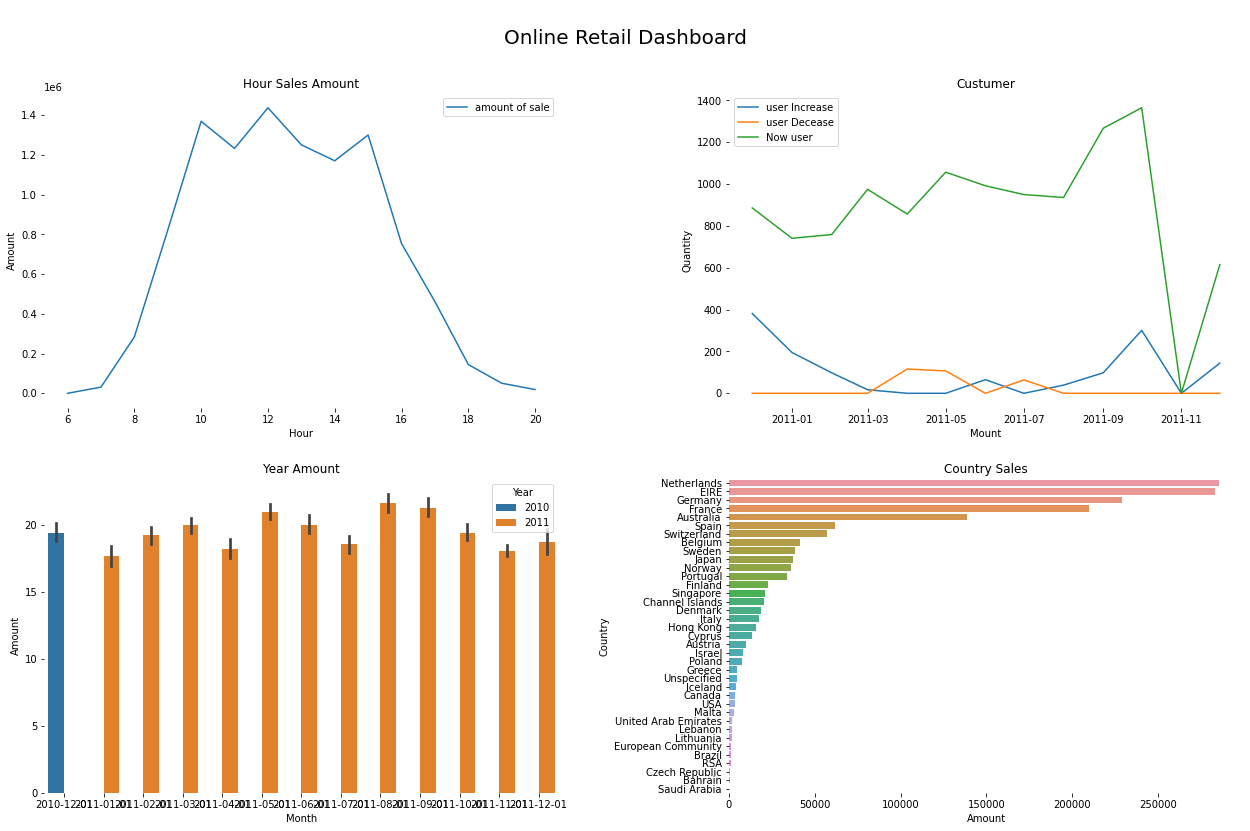

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(18,12))
gs = ax[1, 1].get_gridspec()
for a in ax[1:, -1]:
    a.remove()
axbig = fig.add_subplot(gs[1:, -1])

sns.lineplot(x = 'Hour', y = 'Amount', data = time_sale,label ='amount of sale', ax = ax[0,0])
sns.barplot(x='Month',y='Amount',data = df, hue='Year', ax = ax[1,0])
sns.barplot(y='Country',x='Amount',data = country_sale, label = '.', ax = axbig)
sns.lineplot(data=dfc,x='Month',y='remove', label = "user Increase" ,ax=ax[0,1])
sns.lineplot(data=dfc,x='Month',y='add' , label = "user Decease",ax=ax[0,1])
s2 = sns.lineplot(data=dfc,x='Month',y='total',label = "Now user",ax=ax[0,1])
s2.set(xlabel='Mount', ylabel='Quantity')

ax[0,0].set_title('Hour Sales Amount')
ax[1,0].set_title('Year Amount')
ax[0,1].set_title('Custumer')
axbig.set_title('Country Sales')

plt.tight_layout(pad=3.0)
fig.suptitle('\nOnline Retail Dashboard', fontsize=20)
fig.subplots_adjust(top=0.88)
sns.despine(bottom = True, left = True)


plt.show()